In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [8]:
import george
from george.kernels import ExpSquaredKernel, MyLocalGaussianKernel, ExpKernel, MyLocalExpSquared
from scipy.optimize import curve_fit
import triangle
from lmfit import Parameters, minimize, fit_report


In [9]:
xval = np.array([262.5, 283.0, 305.0, 327.5, 351.5, 377.0, 403.5, 431.0, 459.5, 489.0, 519.5, 550.5, 582.5,
                   616.0, 650.5, 686.5, 724.0, 762.5, 802.0, 843.0, 885.5, 929.5, 975.5, 1023.5, 1073.0, 1124.0, 
                   1176.5, 1231.0, 1287.5, 1346.0, 1406.5, 1469.0, 1534.0, 1601.0, 1670.5, 1742.5, 1816.5, 1893.0, 
                   1972.0, 2053.5, 2138.0, 2225.0, 2314.5, 2407.0, 2502.5, 2600.5, 2701.5, 2806.5, 2915.0, 3027.0, 
                   3143.0, 3263.0, 3387.0, 3515.5, 3648.5, 3785.5, 3927.0, 4074.0, 4226.0, 4383.0, 4546.0]) #mjj in GeV

#half the bin width
xerrminus = np.array([9.5, 11.0, 11.0, 11.5, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 15.5, 16.5, 17.0, 17.5, 
                        18.5, 19.0, 19.5, 20.0, 21.0, 21.5, 22.5, 23.5, 24.5, 25.0, 26.0, 26.5, 28.0, 28.5, 30.0, 
                        30.5, 32.0, 33.0, 34.0, 35.5, 36.5, 37.5, 39.0, 40.0, 41.5, 43.0, 44.0, 45.5, 47.0, 48.5,
                        49.5, 51.5, 53.5, 55.0, 57.0, 59.0, 61.0, 63.0, 65.5, 67.5, 69.5, 72.0, 75.0, 77.0, 80.0, 83.0])

#half the bin width
xerrplus = np.array([9.5, 11.0, 11.0, 11.5, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 15.5, 16.5, 17.0, 17.5, 18.5, 
                       19.0, 19.5, 20.0, 21.0, 21.5, 22.5, 23.5, 24.5, 25.0, 26.0, 26.5, 28.0, 28.5, 30.0, 30.5, 32.0, 
                       33.0, 34.0, 35.5, 36.5, 37.5, 39.0, 40.0, 41.5, 43.0, 44.0, 45.5, 47.0, 48.5, 49.5, 51.5, 53.5,
                       55.0, 57.0, 59.0, 61.0, 63.0, 65.5, 67.5, 69.5, 72.0, 75.0, 77.0, 80.0, 83.0])

yval = np.array([4.917897773E8, 3.799410724E8, 2.571684927E8, 1.841859503E8, 1.35935548E8, 9.41937297E7, 
                   6.79501892E7, 4.90487119E7, 3.49414712E7, 2.5617166E7, 1.85988426E7, 1.31836779E7, 1.0136639E7, 
                   7453854.2, 5553447.2, 4264932.3, 3163415.4, 2362702.7, 1775332.4, 1366279.0, 1026756.5, 788737.4,
                   603941.0, 461687.4, 346323.9, 264838.0, 198505.7, 153246.1, 115508.6, 89024.0, 66542.8, 51185.0, 
                   38806.7, 29264.0, 21907.5, 16796.6, 12379.0, 9150.3, 6763.4, 5155.4, 3874.5, 2786.4, 1945.9, 
                   1482.2, 1085.5, 795.8, 538.7, 379.5, 275.1, 174.8, 136.3, 87.5, 59.7, 37.7, 17.0, 20.2, 13.0, 
                   6.7, 4.0, 3.0, 1.0])

yerr = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
xerr = xerrplus+xerrminus
newy = yval/(xerrplus+xerrminus) #scale data by bin width since curve-fit can't have the model take in an argument
#that isn't a fit parameter
#yerrplus = array("f", [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                   #    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                   #    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                   #    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
#numpoints = 61
#p8757_d1x1y1 = ROOT.TGraphAsymmErrors(numpoints, xval, yval, xerrminus, xerrplus, yerrminus, yerrplus)

Notice that curve_fit is a least squares fit and minimize will minimize what is given, but residual_CDF2009 isn't a -logL

('first fit', [0.55765134184044163, 8.6753690939027468, -5.4038952271892864, -0.042639344285179598])
('second fit', '[[Variables]]\n    p0:   0.04905465 (init= 0.04905465)\n    p1:   7.30873778 (init= 7.308738)\n    p2:  -6.00446454 (init=-6.004465)\n    p3:   0.13473860 (init= 0.1347386)\n[[Correlations]] (unreported correlations are <  0.100)')


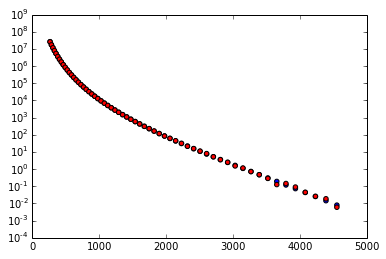

In [51]:
def model2_CDF2009(t, p0, p1, p2, p3): 
    #p0, p1, p2, p3 = params
    sqrts = 8000.
    return (p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))

def model3_CDF2009(t, p0, p1, p2, p3):
    #p0, p1, p2, p3 = params
    sqrts = 8000.
    return np.log(p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))

def residual_CDF2009(params, t,data=None): #gaussian distribution
    #p0, p1, p2, p3 = params
    vals = params.valuesdict()
    p0 =  vals['p0']
    p1 =  vals['p1']
    p2 = vals['p2']
    p3 = vals['p3']
    sqrts = 8000.
    return (np.log(p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))-np.log(data))



# raw fit, KC
fitParams, fitCovariances = curve_fit(model2_CDF2009, xval, newy, p0=(0.0490546530927,7.3087377889,-6.00446454843,0.134738604245), maxfev=100000)#, diag=(1./xval.mean(),1./yval.mean()))


#first fit version using curve_fit
# using log(data)
fitParams, fitCovariances = curve_fit(model3_CDF2009, xval, np.log(newy), p0=(0.0490546530927,7.3087377889,-6.00446454843,0.134738604245), maxfev=100000)#, diag=(1./xval.mean(),1./yval.mean()))

print("first fit", list(fitParams))
fitps = list(fitParams)

#second fit version using lmfit
fit_params = Parameters()
fit_params.add('p0', value=0.0490546530927)
fit_params.add('p1', value=7.3087377889)
fit_params.add('p2', value=-6.00446454843)
fit_params.add('p3', value=0.1347386042)

out = minimize(residual_CDF2009, fit_params, args=(xval,), kws={'data':newy})

print("second fit", fit_report(fit_params))


#residuals = model2_CDF2009(xval,  fitps[0], fitps[1], fitps[2], fitps[3]) - newy
#compare first fit results with data
plt.scatter(xval, model2_CDF2009(xval,  fitps[0], fitps[1], fitps[2], fitps[3])) 
plt.scatter(xval, newy, c='r')
plt.ylim([10e-5, 10e8])
plt.yscale('log')

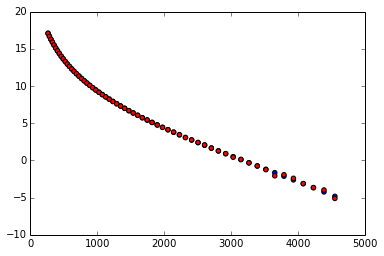

In [52]:
plt.scatter(xval, model3_CDF2009(xval,  fitps[0], fitps[1], fitps[2], fitps[3])) 
plt.scatter(xval, np.log(newy), c='r')



In [53]:
curve_fit?

In [54]:
minimize?

(-100.0, 100.0)

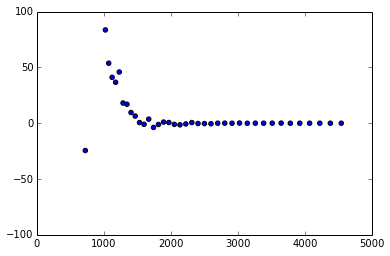

In [56]:
plt.scatter(xval, model2_CDF2009(xval,  fitps[0], fitps[1], fitps[2], fitps[3])-newy) 
plt.ylim(-1E2,1E2)


In [57]:
def nll(params, t,data=None): #gaussian distribution
    #p0, p1, p2, p3 = params
    vals = params.valuesdict()
    p0 =  vals['p0']
    p1 =  vals['p1']
    p2 = vals['p2']
    p3 = vals['p3']
    sqrts = 8000.
    prediction = p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts))
    return (prediction-data)*(prediction-data)/prediction


('third fit', '[[Variables]]\n    p0:   0.04905465 (init= 0.04905465)\n    p1:   7.30873778 (init= 7.308738)\n    p2:  -6.00446454 (init=-6.004465)\n    p3:   0.13473860 (init= 0.1347386)\n[[Correlations]] (unreported correlations are <  0.100)')


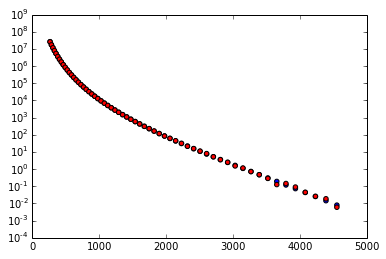

In [58]:
out = minimize(nll, fit_params, args=(xval,), kws={'data':newy})

print("third fit", fit_report(fit_params))

#residuals = model2_CDF2009(xval,  fitps[0], fitps[1], fitps[2], fitps[3]) - newy
#compare first fit results with data
plt.scatter(xval, model2_CDF2009(xval,  fitps[0], fitps[1], fitps[2], fitps[3])) 
plt.scatter(xval, newy, c='r')
plt.ylim([10e-5, 10e8])
plt.yscale('log')

(-1000.0, 100.0)

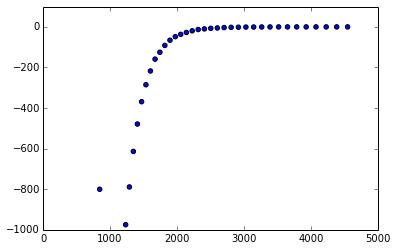

In [62]:
plt.scatter(xval, model2_CDF2009(xval,  0.04905465 , 7.30873778 , -6.00446454, 0.13473860 )-newy) 
plt.ylim(-1E3,1E2)

In [63]:
fit_report(fit_params)

'[[Variables]]\n    p0:   0.04905465 (init= 0.04905465)\n    p1:   7.30873778 (init= 7.308738)\n    p2:  -6.00446454 (init=-6.004465)\n    p3:   0.13473860 (init= 0.1347386)\n[[Correlations]] (unreported correlations are <  0.100)'